# Simple Examples for Using IGMspec (v1.1)

In [1]:
%matplotlib inline

In [2]:
# import
from igmspec import query_catalog as iqcat
from igmspec import interface_db as igidb
from igmspec import db_utils as idbu

from pyigm.surveys.llssurvey import LLSSurvey

## Setup catalog

In [3]:
reload(iqcat)
qcat = iqcat.QueryCatalog()

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the catalog file


In [4]:
qcat

<QueryCatalog:  DB_file=/u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 with 377018 sources
   Loaded surveys are [u'BOSS_DR12', u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7'] 
>

## Setup DB

In [5]:
reload(igidb)
idb = igidb.InterfaceDB()

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the DB file
Available surveys: [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7']


In [6]:
idb

<InterfaceDB:  DB_file=/u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 
   Loaded surveys are [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7'] 
>

## Radial search

### Search around FJ0812+32

In [7]:
ids0812 = qcat.radial_search(('08:12:40.68','+32:08:09'), 1.*u.arcsec)
qcat.show_cat(ids0812)

Your search yielded 1 match[es]
IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
 50734 123.1695  32.1357  2.698           7   0.000 BOSS_PCA
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2


In [8]:
# Grab meta
reload(igidb)
idb = igidb.InterfaceDB()
#meta0812 = idb.grab_meta('KODIAQ_DR1', ids0812, show=True)
meta0812 = idb.grab_meta('SDSS_DR7', ids0812, show=True)

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the DB file
Available surveys: [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7']
IGM_ID    RA     DEC    zem            SPEC_FILE            sig_zem  ... EPOCH  NPIX WV_MIN WV_MAX   R    SURVEY_ID
------ ------- ------- ------ ---------------------------- --------- ... ------ ---- ------ ------ ------ ---------
 50734 123.170  32.136  2.704 spSpec-52318-0861-333.fit.gz 0.0015619 ... 2000.0 3852 3799.3 9221.5 2000.0      9317


In [9]:
meta0812

zem,sig_zem,Z_CONF,Z_WARN,PLATE,MJD,FIBERID,FLG_TARG,RA,DEC,PSF_U,PSF_G,PSF_R,PSF_I,PSF_Z,PSF_SU,PSF_SG,PSF_SR,PSF_SI,PSF_SZ,DATE-OBS,IGM_ID,EPOCH,SPEC_FILE,NPIX,WV_MIN,WV_MAX,R,SURVEY_ID
float32,float32,float32,int16,int32,int32,int32,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str11,int64,float64,str28,int64,float64,float64,float64,int64
2.704,0.0015619,0.0,0,861,52318,333,0,123.170,32.136,19.6334,17.8486,17.4545,17.2825,17.139,0.02811,0.017889,0.021285,0.018897,0.028298,2002-Feb-13,50734,2000.0,spSpec-52318-0861-333.fit.gz,3852,3799.3,9221.5,2000.0,9317


In [10]:
# Grab spectra
J0812spec = idb.grab_spec('KODIAQ_DR1', ids0812)

Staged 1 spectra totalling 0.0032 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:211: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


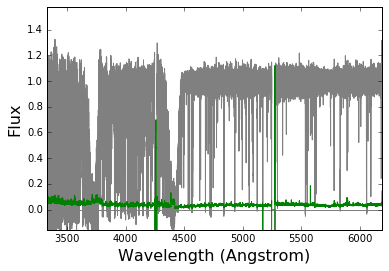

In [11]:
J0812spec.plot()

### Search around J233446.40-090812.3

In [12]:
ids2334 = qcat.radial_search('J233446.40-090812.3', 1.*u.arcsec)
qcat.show_cat(ids2334)

Your search yielded 1 match[es]
IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
376379 353.6934  -9.1368  3.317          14   0.001     SDSS
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2


In [13]:
# Grab meta
meta2334 = idb.grab_meta('HD-LLS_DR1', ids2334, show=True)

IGM_ID    RA     DEC    zem                 SPEC_FILE               ...   DATE-OBS  WV_MIN  WV_MAX    R    SURVEY_ID
------ ------- ------- ------ ------------------------------------- ... ----------- ------ ------- ------- ---------
376379 353.693  -9.137  3.317   HD-LLS_J233446.40-090812.3_ESI.fits ... 2002-Dec-02 3899.8 11714.9  6000.0       140
376379 353.693  -9.137  3.317 HD-LLS_J233446.40-090812.3_HIRES.fits ... 2007-Sep-18 4064.6  7120.0 48000.0       141
376379 353.693  -9.137  3.317  HD-LLS_J233446.40-090812.3_MAGE.fits ... 2016-Jul-17 3042.1 10269.6  5000.0       142


In [14]:
meta2334

Name,QSO,RA,DEC,zem,Z_LLS,logNHI,sig(logNHI) [2],SPEC_FILE,IGM_ID,EPOCH,NPIX,DATE-OBS,WV_MIN,WV_MAX,R,SURVEY_ID
str33,str19,float64,float64,float64,float64,float64,float64,str37,int64,float64,int64,str11,float64,float64,float64,int64
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_ESI.fits,376379,2000.0,33000,2002-Dec-02,3899.8,11714.9,6000.0,140
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_HIRES.fits,376379,2000.0,129277,2007-Sep-18,4064.6,7120.0,48000.0,141
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_MAGE.fits,376379,2000.0,16580,2016-Jul-17,3042.1,10269.6,5000.0,142


In [15]:
# Grab spectra
J2334spec = idb.grab_spec('HD-LLS_DR1', ids2334)

Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


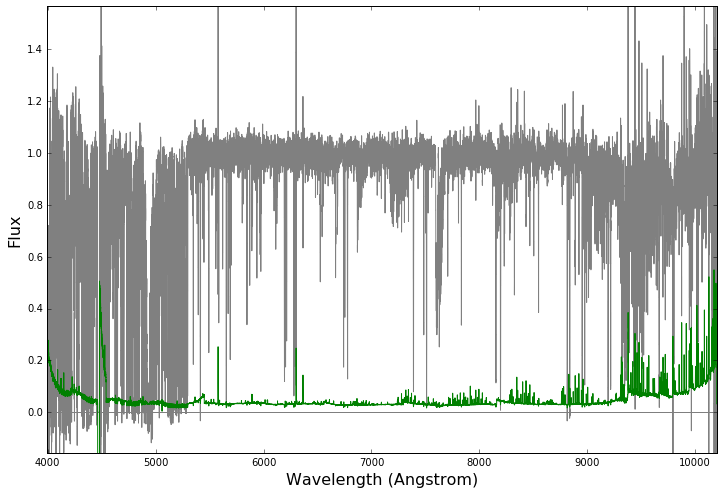

In [16]:
# Plot the first one (ESI)
J2334spec.plot(inline=True)

----

## Simple catalog search

### LLS from SDSS_DR7 vs. IGMspec

In [17]:
sdss_dr7_all = LLSSurvey.load_SDSS_DR7(sample='all')
sdss_dr7_all

SDSS-DR7: Loading LLS file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz


<IGMSurvey: nsys=1935, type=LLS, ref=SDSS-DR7, nsightlines=3759>

In [18]:
# Grab the coord
lls_coord = sdss_dr7_all.coord
lls_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(339.61320833, 13.90905556), (160.36441667, 2.65569444),
     (167.247, 3.19108333), ..., (230.02470833, 23.66472222),
     (124.528625, 7.32227778), (150.86345833, 22.97005556)]>

In [19]:
# Match
lls_ids = qcat.match_coord(lls_coord)

Your search yielded 1779 matches


In [20]:
# Show cat
qcat.show_cat(lls_ids)

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
   881   0.7514  16.0077  3.662           3   0.002 BOSS_PCA
   897   0.7640 -10.8641  3.638           3   0.001 BOSS_PCA
  1680   1.4016  13.9971  3.709           3   0.002 BOSS_PCA
  2168   1.8785  16.1257  3.519           3   0.002 BOSS_PCA
  3248   2.8135  14.7672  4.986          19   0.003 BOSS_PCA
  5192   4.5579  14.4155  4.216           3   0.001 BOSS_PCA
  5225   4.5863  14.3143  3.938           3   0.004 BOSS_PCA
  5482   4.8268  15.1032  4.145           3   0.003 BOSS_PCA
  5617   4.9586  -0.6780  4.319           3   0.010 BOSS_PCA
  5987   5.3335  15.8571  3.690           3   0.001 BOSS_PCA
   ...      ...      ...    ...         ...     ...      ...
376917 130.2708  18.5522  4.220           2   0.001     SDSS
376918 190.2134  29.0556  3.743           2   0.001     SDSS
376920 128.9693  16.5622  4.251           2   0.002     SDSS
376926 135.9408  13.3888

In [21]:
# Grab GGG spec
LLSspec = idb.grab_spec('GGG', lls_ids)

Staged 172 spectra totalling 0.0044032 Gb
Loaded spectra


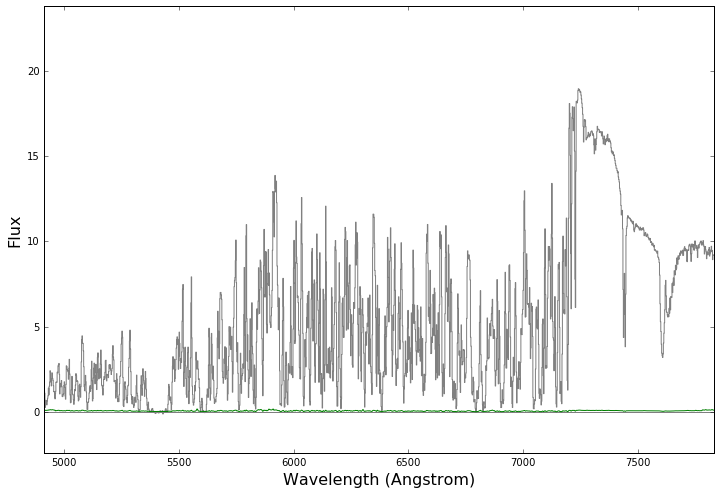

In [22]:
# Show the first spectrum
LLSspec.plot(inline=True)

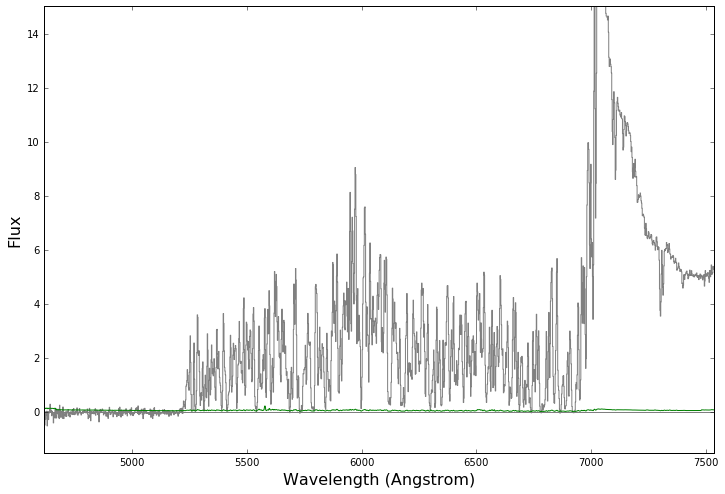

In [23]:
# Show the 10th spectrum
LLSspec.select=9
LLSspec.plot(inline=True)

----

## Time Evolution

In [27]:
ggg_kodiaq = qcat.cat['flag_survey'] == 18

In [28]:
ids_time = qcat.cat['IGM_ID'][ggg_kodiaq]
qcat.show_cat(ids_time)

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
376126 264.4370  58.4749  4.941          18   0.001     SDSS
376258 170.7229   0.8916  4.551          18   0.001     SDSS
376324 222.7831   2.9377  4.481          18   0.001     SDSS
376343  21.2893 -10.7169  4.492          18   0.001     SDSS
376437 337.1881  -7.9654  5.142          18   0.001     SDSS
376444 314.3506  -0.5052  4.663          18   0.001     SDSS
376456  54.6221   0.3656  5.032          18   0.001     SDSS
376544 215.4375  35.2210  4.549          18   0.001     SDSS
376547 243.6960  20.9842  5.091          18   0.001     SDSS
376600 205.1677  28.2245  5.338          18   0.001     SDSS
376693 243.6047  46.6747  5.313          18   0.001     SDSS
376736 205.4228  46.1862  5.023          18   0.001     SDSS
376750 173.1938  12.1505  5.167          18   0.002     SDSS
376762 238.1793  25.8748  4.666          18   0.000     SDSS
376767 244.0921   5.0244

In [29]:
reload(igidb)
idb = igidb.InterfaceDB()
meta = idb.grab_meta(['GGG','KODIAQ_DR1'], ids_time)

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the DB file
Available surveys: [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7']
IGM_ID    RA     DEC    zem            SPEC_FILE                SDSSJ        ... NPIX WV_MIN  WV_MAX   R   SURVEY_ID
------ ------- ------- ------ --------------------------- ------------------ ... ---- ------ ------- ----- ---------
376343  21.289 -10.717  4.498 SDSSJ0125-1043_B600.fits.gz 012509.42-104300.8 ... 1580 4335.6  7242.5 940.0         3
376787  52.832  -7.695  4.734 SDSSJ0331-0741_B600.fits.gz 033119.66-074143.1 ... 1586 4629.0  7554.7 940.0         6
376456  54.622   0.366  5.040 SDSSJ0338+0021_B600.fits.gz 033829.30+002156.2 ... 1580 4948.1  7871.7 940.0         7
376258 170.723   0.892  4.586 SDSSJ1122+0053_B600.fits.gz 112253.50+005329.7 ... 1588 4627.0  7556.0 940.0        56
376750 173.194  12.150  5.180 SDSSJ1132+1209_B600.fits.gz 113246.50+120901.6 ... 1581 5135.0  8060.8 940.0        59
376600 205.168  28.224  5.349 SD

In [31]:
spec_time = idb.grab_spec(['GGG','SDSS_DR7'], ids_time)

Staged 34 spectra totalling 0.0008704 Gb
Loaded spectra
Staged 17 spectra totalling 0.001088 Gb
Loaded spectra


In [32]:
spec_time

[<XSpectrum1D: file=none, wvmin=4335.6 Angstrom, wvmax=7242.52 Angstrom>,
 <XSpectrum1D: file=none, wvmin=3800.14 Angstrom, wvmax=9206.62 Angstrom>]

### Plot both

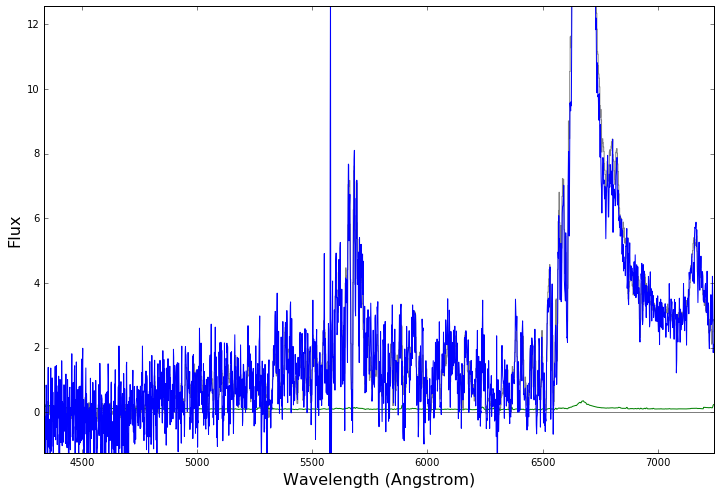

In [33]:
spec_time[0].plot(plot_two=spec_time[1],inline=True)

----

## Pairs

### QPQ8 like

#### Query on separation (angular and redshift)

In [34]:
qcat = iqcat.QueryCatalog()
ID_fg, ID_bg = qcat.pairs(30*u.arcsec, 3000.*u.km/u.s)

Using /u/xavier/local/Python/igmspec/DB/IGMspec_DB_ver01.hdf5 for the catalog file


In [35]:
qcat.show_cat(ID_fg)

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
   293   0.2461  28.3758  0.985           1  -1.000 BOSS_PCA
   434   0.3669   8.6782  2.794           1   0.003 BOSS_PCA
   851   0.7280  21.6517  1.877           1  -1.000 BOSS_PCA
  1006   0.8555  13.4381  0.628           1  -1.000 BOSS_PCA
  1638   1.3680  25.7650  2.545           1  -1.000 BOSS_PCA
  2491   2.1692  17.1640  1.380           1  -1.000 BOSS_PCA
  2749   2.3791  17.4591  0.665           1  -1.000 BOSS_PCA
  2831   2.4458  12.0703  2.254           1   0.002 BOSS_PCA
  2873   2.4857  26.2747  1.997           1   0.001 BOSS_PCA
  2941   2.5424  32.9975  2.043           1  -1.000 BOSS_PCA
   ...      ...      ...    ...         ...     ...      ...
374514 182.9992  32.6694  1.973           2   0.001     SDSS
374687 191.6346  23.7587  1.968           2   0.008     SDSS
374757 247.8406  43.5548  2.020           2   0.002     SDSS
374853 222.0910  56.8378

#### Check for high dispersion spectrum in b/g QSOs

In [36]:
highdisp = qcat.cut_on_surveys(['HD-LLS_DR1', 'KODIAQ_DR1'], ID_bg)

In [37]:
qcat.show_cat(ID_bg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
376957  36.4785   0.9144  2.975           4   0.000   SIMBAD
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2


In [38]:
qcat.show_cat(ID_fg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
 35491  36.4786   0.9213  1.770           1   0.000 BOSS_PCA
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2
